In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
fem_preg_df = pd.read_csv('./data/FemPreg.csv')
fem_preg_df.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [3]:
# Validate data
fem_preg_df['outcome'].value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

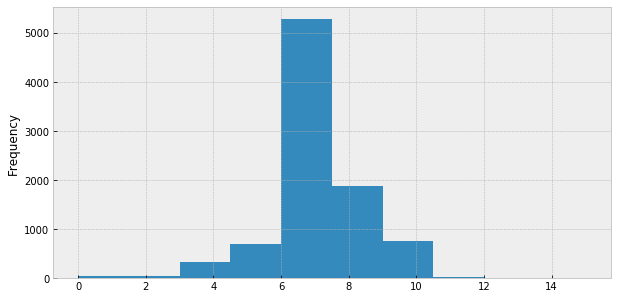

In [4]:
fem_preg_df['birthwgt_lb'].plot.hist()

/home/rlllok/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rlllok/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


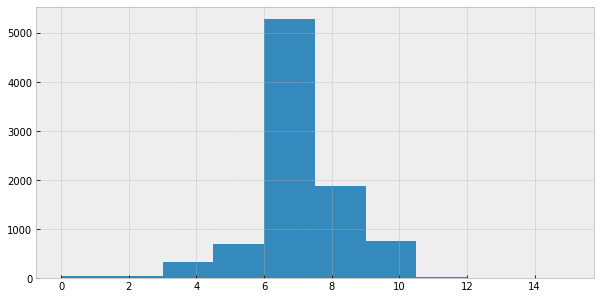

In [5]:
plt.hist(fem_preg_df['birthwgt_lb'])
plt.show()

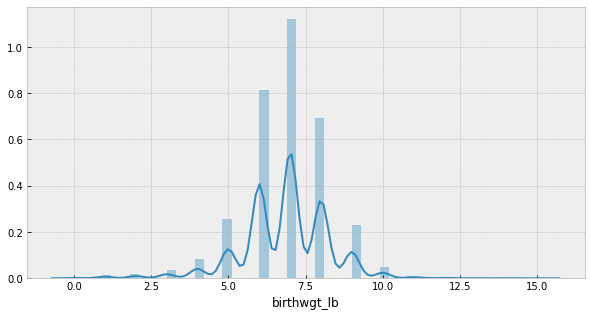

In [6]:
sns.distplot(fem_preg_df['birthwgt_lb'])
plt.show()

In [7]:
live = fem_preg_df[fem_preg_df.outcome == 1]

/home/rlllok/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rlllok/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


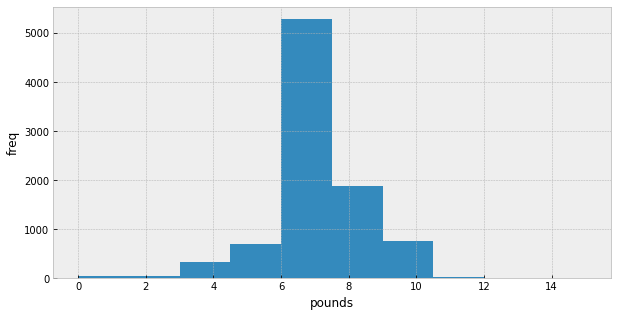

In [8]:
plt.hist(live['birthwgt_lb'], label='birthwgt_lb')
plt.xlabel('pounds')
plt.ylabel('freq')
plt.show()

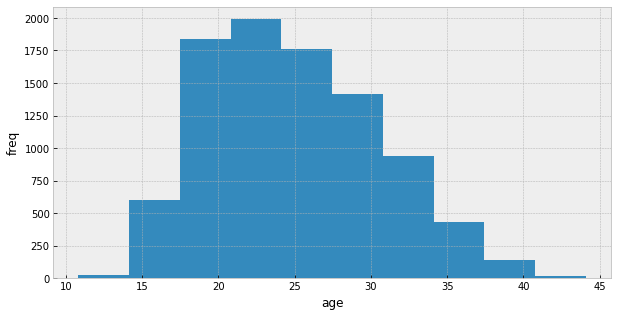

In [9]:
plt.hist(live['agepreg'], label='agepreg')
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

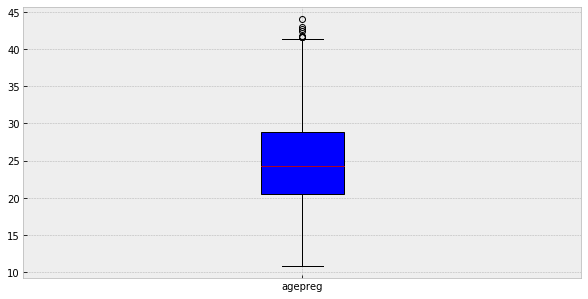

In [10]:
plt.boxplot(live['agepreg'],
            patch_artist=True,
            labels=['agepreg'])
plt.show()

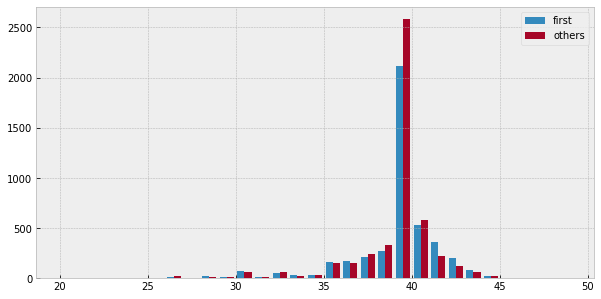

In [11]:
# First babies
live = fem_preg_df[fem_preg_df.outcome == 1]

firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

plt.hist([firsts.prglngth, others.prglngth],
         bins=range(20, 50))
plt.legend(['first', 'others'])
plt.show()

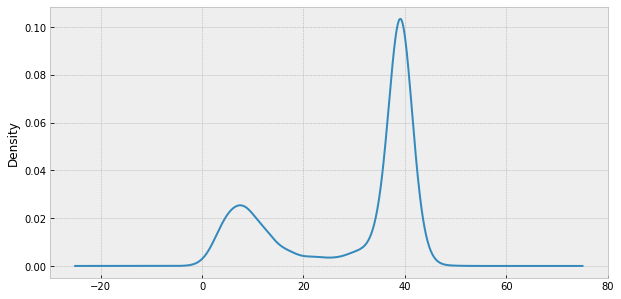

In [12]:
fem_preg_df['prglngth'].plot.kde()

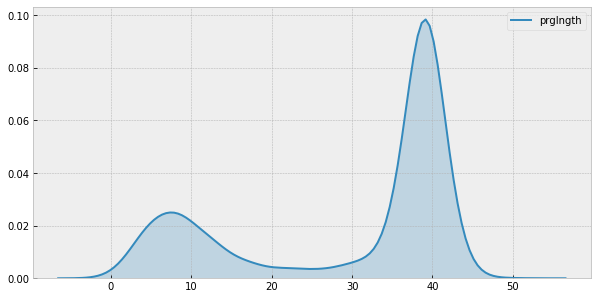

In [13]:
sns.kdeplot(fem_preg_df['prglngth'], shade=True)

In [14]:
live.describe()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
count,9148.000000,9148.000000,0.0,0.0,0.0,0.0,9148.000000,9.000000,9144.000000,163.000000,...,9148.000000,9148.000000,9148.0,9148.000000,9148.000000,9148.000000,9148.000000,9148.000000,0.0,9038.000000
mean,6176.405444,2.275251,NaN,NaN,NaN,NaN,5.777766,4.777778,1.022419,1.834356,...,0.000875,0.003279,0.0,4338.427312,5546.231903,8404.364417,1.492567,43.491911,NaN,7.265628
std,3655.926584,1.443628,NaN,NaN,NaN,NaN,0.424359,2.166667,0.190098,1.630208,...,0.029561,0.060879,0.0,3973.481635,5529.242584,9142.507490,0.499972,24.131927,NaN,1.408293
min,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,64.577101,71.201194,118.656790,1.000000,1.000000,NaN,0.125000
25%,2965.750000,1.000000,NaN,NaN,NaN,NaN,6.000000,5.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,2418.079208,2887.345159,3995.837136,1.000000,23.000000,NaN,6.500000
50%,6060.000000,2.000000,NaN,NaN,NaN,NaN,6.000000,6.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,3410.378420,4218.654327,6415.602101,1.000000,45.000000,NaN,7.375000
75%,9388.250000,3.000000,NaN,NaN,NaN,NaN,6.000000,6.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,4870.684911,5958.147674,9555.442649,2.000000,64.000000,NaN,8.125000
max,12571.000000,17.000000,NaN,NaN,NaN,NaN,6.000000,6.000000,5.000000,5.000000,...,1.000000,2.000000,0.0,99707.832014,157143.686687,261879.953864,2.000000,84.000000,NaN,15.437500


/home/rlllok/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rlllok/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


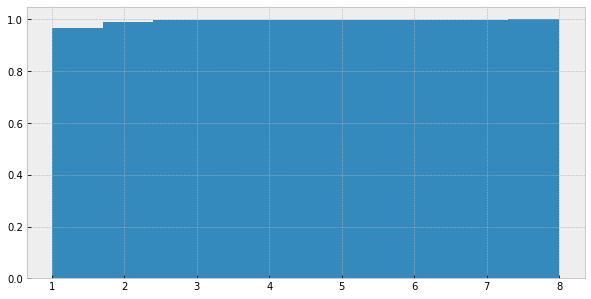

count    1293.000000
mean        1.045630
std         0.312668
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: birthplc, dtype: float64

In [15]:
hx, hy, _ = plt.hist(firsts.birthplc, cumulative=True, density=True)
plt.show()
firsts.birthplc.describe()

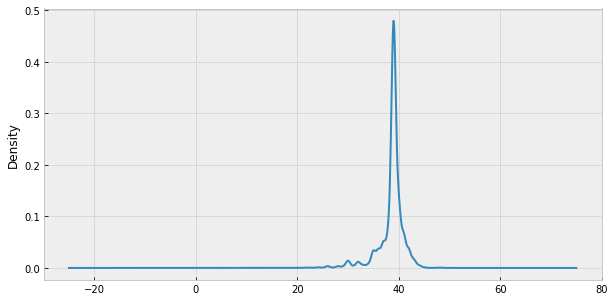

In [16]:
live.prglngth.plot.density()

In [17]:
live.prglngth.skew()

-2.855768973468355

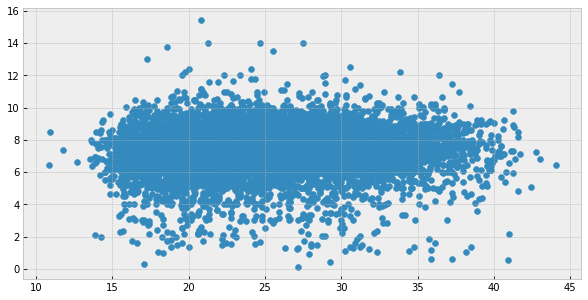

In [18]:
live.dropna(subset=['agepreg', 'totalwgt_lb'])

br_weight = live.totalwgt_lb
mother_age = live.agepreg

plt.scatter(mother_age, br_weight)

plt.show()

In [19]:
groups = live.groupby('agepreg')

In [20]:
prc_25 = groups['totalwgt_lb'].quantile(0.25).values
prc_50 = groups['totalwgt_lb'].quantile(0.50).values
prc_75 = groups['totalwgt_lb'].quantile(0.75).values

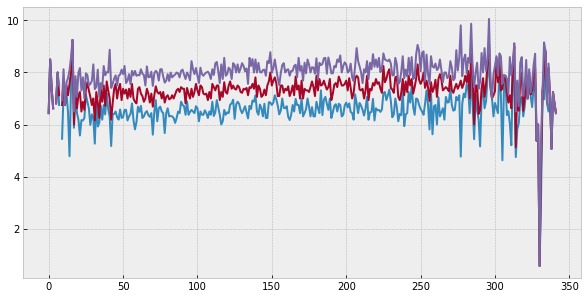

In [21]:
plt.plot(prc_25)
plt.plot(prc_50)
plt.plot(prc_75)
plt.show()

In [22]:
bins = np.arange(10, 48, 3)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

In [23]:
prc_25 = groups['totalwgt_lb'].quantile(0.25).values
prc_50 = groups['totalwgt_lb'].quantile(0.50).values
prc_75 = groups['totalwgt_lb'].quantile(0.75).values

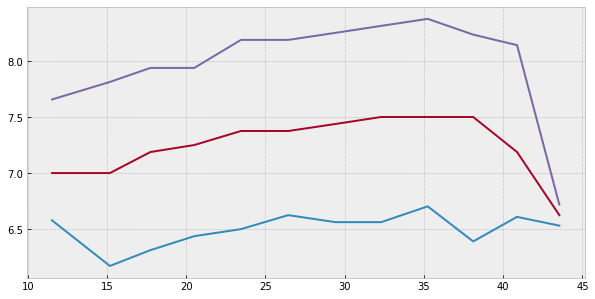

In [24]:
plt.plot(groups.agepreg.mean(), prc_25)
plt.plot(groups.agepreg.mean(), prc_50)
plt.plot(groups.agepreg.mean(), prc_75)
plt.show()

In [25]:
indices

array([ 8, 10,  2, ...,  3,  4,  4])

In [26]:
live.corr(method='spearman')['totalwgt_lb']['agepreg']

0.09461004109658228

In [27]:
live.corr(method='pearson')['totalwgt_lb']['agepreg']

0.06883397035410915

In [28]:
fem_preg_df['finalwgt']

0         6448.271112
1         6448.271112
2        12999.542264
3        12999.542264
4        12999.542264
             ...     
13588     6269.200989
13589     6269.200989
13590     6269.200989
13591     6269.200989
13592     6269.200989
Name: finalwgt, Length: 13593, dtype: float64